Theophile Theba                                                                                                   
 -                                                  Machine Learning Midterm 

In [ ]:
# Import necessary libraries
import pandas as pd 
import certifi
import pymongo 
# Load MongoDB connection string from the secrets file
import json
with open(r'C://Users//theop//OneDrive//Documents//cf//credentials.json') as f:
    credentials = json.load(f)
    secret = credentials['mongodb']
    # Connect to MongoDB
client = pymongo.MongoClient(secret,tlsCAFile=certifi.where())

#fetch the database
da320_database = client['DA320']
db = client['DA320']

#
allcollections = da320_database.list_collection_names()

#
print(f"USing MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allcollections}")

In [ ]:
import pandas
import re
import collections
# find data from IMDB of a year
imdb_view = pandas.DataFrame(da320_database.imdb.find({"release_date": re.compile("2000")}))
# find from Metacritic 
metacritic_view= pandas.DataFrame(da320_database.metacritic.find({"release_date": re.compile("2000")}) )
metacritic_view.head()
imdb_view.head()

In [ ]:
# convert value to number
import pandas 
metacritic_view.score= pandas.to_numeric(metacritic_view.score, errors='coerce')
metacritic_view.release_date= pandas.to_datetime(metacritic_view.release_date, errors='coerce')
imdb_view.release_date = pandas.to_datetime(imdb_view.release_date, errors="coerce")
# merge 
Unified_view = pandas.merge(imdb_view,metacritic_view, how="inner", on="title")
print(Unified_view.head())

In [ ]:
import statsmodels.formula.api 
# linear relationship
ols_model= statsmodels.formula.api.ols(
    "gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
     data=Unified_view).fit()
print(ols_model.summary())

In [ ]:
from transformers import pipeline

 # Create an AI/ML pipeline using cardiffnlp/twitter-xlm-roberta-base-sentiment
sentiment_pipeline = pipeline('sentiment-analysis', model='cardiffnlp/twitter-xlm-roberta-base-sentiment')
# Try a positive
print( sentiment_pipeline("Lebron James is the MVP"))
# Another one # YESHUA
print(sentiment_pipeline("Yeshua the Savior"))
# Trying a negative
print(sentiment_pipeline("Who killed Yeshua?"))


In [ ]:
# Sentiment into a single number
def calculate_sentiment(text):
    if text is None:
        return 0
    sentiment = sentiment_pipeline(text)
    if sentiment [0]['label'] == 'negative':
            return 0 - sentiment[0]['score'] - 0.5
    elif sentiment[0]['label'] == 'neutral' :
            return sentiment[0]['score'] - 0.5
    elif sentiment [0]['label'] == 'positive':
            return 1+ sentiment[0]['score'] - 0.5
# test the function
print(calculate_sentiment("Way, Truth, Life is Yeshua, The almighty God"))
print(calculate_sentiment("Yes JESUS is king"))
print(calculate_sentiment(" The living water is dwelling in his people"))
print(None) 

In [ ]:
# create new columns for sentiment
sentiment_column = Unified_view.apply(lambda row: calculate_sentiment(row.get('description')), axis=1)

# Add column back  to unified view
Unified_view['sentiment'] = sentiment_column

Unified_view.head()


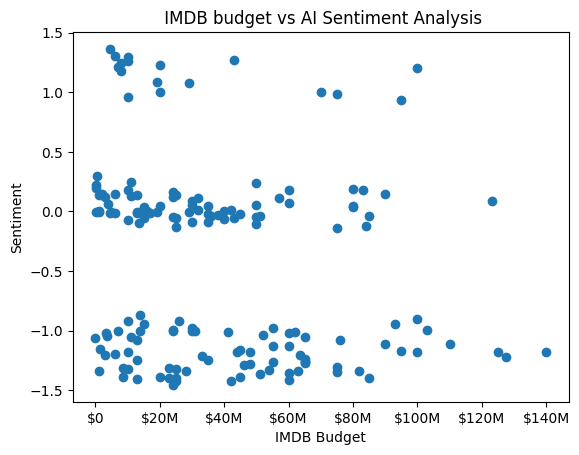

In [9]:
# plot chart1
from matplotlib import pyplot
import numpy as np
def format_currency (amount, _):
    if amount> 1_000_000_000_000:
        return f"${round(amount/ 1_000_000_000_000)}T"
    elif  amount> 1_000_000_000:
        return f"${round(amount/ 1_000_000_000)}B"
    elif  amount> 1_000_000:
        return f"${round(amount/ 1_000_000)}M"
    elif  amount> 1_000:
        return f"${round(amount/ 1_000)}K"
    else:
        return f"${round(amount)}"
    
# plot chart 
pyplot.scatter(Unified_view['budget'], Unified_view['sentiment'])
pyplot.title(' IMDB budget vs AI Sentiment Analysis')
pyplot.xlabel('IMDB Budget')
pyplot.ylabel('Sentiment')
pyplot.gca().xaxis.set_major_formatter(format_currency)
pyplot.show()

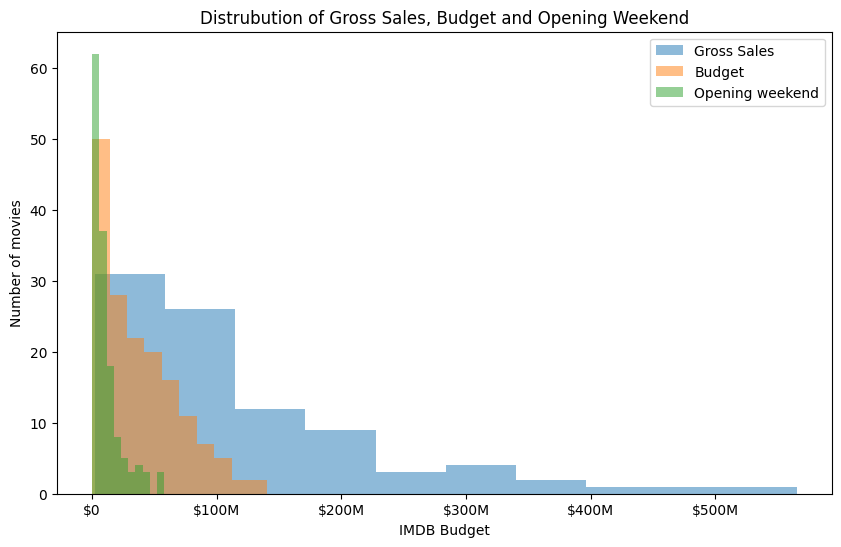

In [15]:
# plot chart2
from matplotlib import pyplot
import numpy as np
def format_currency (amount, _):
    if amount> 1_000_000_000_000:
        return f"${round(amount/ 1_000_000_000_000)}T"
    elif  amount> 1_000_000_000:
        return f"${round(amount/ 1_000_000_000)}B"
    elif  amount> 1_000_000:
        return f"${round(amount/ 1_000_000)}M"
    elif  amount> 1_000:
        return f"${round(amount/ 1_000)}K"
    else:
        return f"${round(amount)}"

pyplot.figure(figsize=(10,6))
pyplot.title('Distrubution of Gross Sales, Budget and Opening Weekend')
pyplot.xlabel('IMDB Budget')
pyplot.ylabel('Number of movies')
pyplot.hist(Unified_view['gross_sales'], alpha=.5, label='Gross Sales')
pyplot.hist(Unified_view['budget'], alpha=.5, label='Budget')
pyplot.hist(Unified_view['opening_weekend'], alpha =.5, label='Opening weekend')
pyplot.legend(loc='upper right')
pyplot.gca().xaxis.set_major_formatter(format_currency)
pyplot.show()


Conclusion: 
First, I would like to Thank you two of my peers who helped me a lot Is Kenneth and Nicholas, they helped me with the merge part and the AI part. the idea came from them. 
1st chart :According to the data, the budget are in outlier because some of them are creazy as amount and also the currency might impact too.. Outliers could represent movies that defy the general trend. For instance, a low-budget movie with an exceptionally high sentiment score might be an outlier, suggesting that factors other than budget contribute to the sentiment.

2nd chart Compare the heights of the bars for 'Gross Sales,' 'Budget,' and 'Opening Weekend.' This can provide insights into the relative magnitudes of these financial metrics and their distributions.
in summary,the histogram provides a visual representation of the distribution of financial metrics for movies, allowing us to identify patterns, trends, and potential insights into the financial performance of movies in our dataset. Interpretation will be more meaningful when considering the specific characteristics of the movie industry and the goals of our analysis.